In [ ]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
#fish에 저장된 데이터 프레임에서 상위 5개의 행을 출력해 봄
fish.head()

#맨 왼쪽에 0, 1, 2...숫자는 행 번호(판다스의 인덱스)이고, 맨 위에 쓰여진 Species, weight,..sms duf wpahrdlek.


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
#Species 열에서 고유한 값들 추출
#Species 열을 타깃 데이터로 이용함 
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
#Species빼고 나머지 열 선택
#선택 후 넘파이 배열로 만듦
#데이터 프레임에서 열을 선택하면 새로운 데이터프레임이 반환됨
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])


[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
#타깃 데이터 만들기
fish_target = fish['Species'].to_numpy()
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [ ]:
#훈련 데이터 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [ ]:
#훈련 세트와 테스트 세트를 표준화 전처리함
#반드시 훈련 세트의 통계값으로 테스트 세트를 변환해야 함
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled  = ss.transform(test_input)

In [ ]:
#k-최근접 이웃 분류기로 테스트 세트에 들어 있는 확률 예측
#최근접 이웃 개수는 3으로 지정하 kn객체 생성
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
#KNeighborsClassifier의 정렬된 타깃값
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
#테스트 세트에 있는 처음 5개 샘플의 타깃값 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
#predict_proba() 메서드로 클래스별 확률값 추출
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
#소수점 4자리까지 반올림하여 나타냄
#이때 출력 순서는 classes_ 속성의 순서와 같음
#즉, 첫 번ㄴ째 열이 Bream에 대한 확률인 것이다.
#열은 샘플 종류
#행은 종의 종류를 나타냄
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
#kneighbors()를 이용해 실제로 가장 가꾸운 이웃의 비율을 알아봄
#kneighbors메서드는 항상 2차원 배열로 전달해야 함
#넘파이의 슬라이싱 연산자의 결과는 2차원 배열이기 때문에 슬라이싱 연산자를 썼음
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])
#Roach의 확률은 1/3 = 0.3333
#Perch의 확률은 2/3 = 0.6667로 출력했던 샘플들의 클래스 확률과 같다.

[['Roach' 'Perch' 'Perch']]


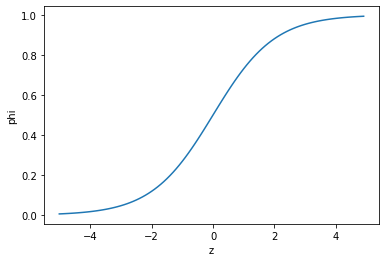

In [ ]:
#로지스틱 회귀
import numpy as np
import matplotlib.pyplot as plt
#-5와 5 사이에 0.1 간격으로 배열을 만듦
z   = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
#우선 도미와 빙어를 사용해서 이진 분류
#로지스틱 회귀로 이진 분류 수행하기
#train_target에서 도미와 빙어에 대한 행만 골라낼 수 있음
bream_smelt_indexes = (train_target == 'Bream')|(train_target == 'Smelt')
train_bream_smelt   = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
#훈련세트의 처음 5개 샘플을 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
#train_bream_smelt의 처음 5개의 샘플의 예측 확률 출력해보기
print(lr.predict_proba(train_bream_smelt[:5]))
#첫 번째 열이 음성 클래스(0)에 대한 확률
#두 번째 열이 양성 클래스(1)에 대한 확률
#k-최근접 이웃 분류기에서 보았듯이 사이킷런은 타깃값을 알파벳순으로 정렬하여 사용함
#이를 확인하기 위해서는 모델의 classes_속성을 확인해야 한다.

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_)
#빙어(Smelt)가 양성 클래스로 드러남
#만약 Bream을 양성 클래스로 사용하려면 2장에서 했던 것처럼 수작업으로 하면 됨

['Bream' 'Smelt']


In [ ]:
#앞서 로지스틱 회귀는 외귀이지만 분류 모델이라 했다.
#로지스틱 회귀는 선령 모델이기 때문에 방정식의 계수(가중치, 기댓값)을 학습한다.
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
#decision_function()메서드로 z(함수값)을 출력할 수 있음
#train_bream_smelt의 처음 5개의 샘플의 z값을 출력
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
#이 z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있음


[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
#scipy라이브러리에 있는 시그모이드 함ㅓ수인 expit()을 이용하여 확률을 구해 봄
from scipy.special import expit
print(expit(decisions))
#predict_proba() 메서드 출력의 두 번째 열의 값과 동일
#따라서 lr.decision_function() 메서드는 양성 클래스에 대한 z값을 반환함

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]




---


로지스틱 회귀로 다중 분류 수행하기


---



In [ ]:
#다중 분류 수행
#충분한 반복 계산을 위해 반복 횟수를 1000으로 늘리고,
#계수의 규제를 1에서 20으로 늘려서 과대·과소적합을 완화함
lr = LogisticRegression(max_iter = 1000, C = 20)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
#처음 5개 샘플에 대한 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
#이 5개 샘플에 대한 예측 확률
#소수점 4째자리에서 반올림함
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))
#5개의 샘플을 조사했으므로 5개의 행
#7개의 생선에 대한 확률을 계산했으므로 7개의 열이 출력

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
#각 열이 어떤 생선을 나타내는지 확인
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
#다중 분류의 선형 방정식을 형태 확인
print(lr.coef_.shape, lr.intercept_.shape)
#5개의 특성(길이, 두께, 대각선, 무게, 높이)을 사용하므로 coef_ 배열의 열은 5개
#행이 6개인 것은 z를 7개나 계산한다는 의미임
#다중 분류는 클래스마다 z값을 하나씩 계산한다.
#이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1사이의 값으로 변환했지만
#다중 분류는 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환한다.

(7, 5) (7,)


In [ ]:
#소프트 맥스를 이용하여 7개의 z값 변환
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
#scipy는 소프트맥스 함수도 제공함
from scipy.special import softmax
#7개의 z값의 확률을 각각 구해봄
#행을 따라 계산함 즉, 각 샘플마다 softmax를 계산한다는 뜻임
#axis를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산하게 됨
proba = softmax(decisions, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
